# Reading Dataset

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("vgsales.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Preprocessing

In [2]:
df=df[df["Year"].notnull()]
df = df[df["Publisher"].notnull()]
df = df[(df["Global_Sales"]!=0) & (df["NA_Sales"]!=0) & (df["EU_Sales"]!=0) & (df["JP_Sales"]!=0) & (df["Other_Sales"]!=0)]
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
11896,11898,Grand Kingdom,PSV,2015.0,Role-Playing,Nippon Ichi Software,0.01,0.02,0.04,0.01,0.07
12012,12014,Guilty Gear Xrd -Revelator-,PS3,2016.0,Fighting,PQube,0.01,0.02,0.02,0.01,0.07
12488,12490,Odin Sphere: Leifthrasir,PS3,2016.0,Role-Playing,Nippon Ichi Software,0.01,0.02,0.03,0.01,0.06
13000,13002,Natural Doctrine,PS3,2014.0,Role-Playing,Nippon Ichi Software,0.03,0.01,0.01,0.01,0.05


In [3]:
df_new=df.drop(["Name", "Platform", "Year", "Publisher", "Rank"], axis=1)
list(df_new.columns)
df_new = pd.get_dummies(df_new,columns=['Genre'])

In [4]:
X = df_new.drop(['Global_Sales'],axis=1)
X.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,41.49,29.02,3.77,8.46,0,0,0,0,0,0,0,0,0,0,1,0
1,29.08,3.58,6.81,0.77,0,0,0,0,1,0,0,0,0,0,0,0
2,15.85,12.88,3.79,3.31,0,0,0,0,0,0,1,0,0,0,0,0
3,15.75,11.01,3.28,2.96,0,0,0,0,0,0,0,0,0,0,1,0
4,11.27,8.89,10.22,1.00,0,0,0,0,0,0,0,1,0,0,0,0


In [5]:
y = df_new['Global_Sales']
y

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
11896     0.07
12012     0.07
12488     0.06
13000     0.05
13281     0.05
Name: Global_Sales, Length: 2365, dtype: float64

In [6]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1655, 16), (710, 16), (1655,), (710,))

# Decision Tree Model

In [7]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()

DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

print("The Training accuracy of the model is {:.2f}".format(DT.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(DT.score(X_test, y_test)))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.96


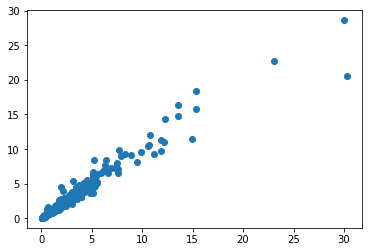

In [8]:
plt.scatter(y_pred,y_test)

# KNN Model

In [9]:
from sklearn.neighbors import KNeighborsRegressor

KN = KNeighborsRegressor()

KN.fit(X_train, y_train)
y_pred = KN.predict(X_test)

print("The Training accuracy of the model is {:.2f}".format(KN.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(KN.score(X_test, y_test)))

The Training accuracy of the model is 0.93
The Testing accuracy of the model is 0.98


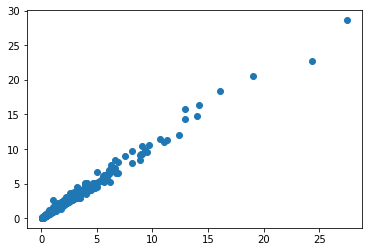

In [10]:
plt.scatter(y_pred,y_test)

# Random Forest Model

In [11]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()

RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

print("The Training accuracy of the model is {:.2f}".format(RF.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(RF.score(X_test, y_test)))

The Training accuracy of the model is 0.99
The Testing accuracy of the model is 0.98


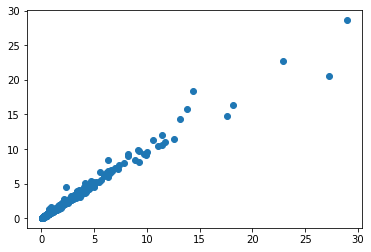

In [12]:
plt.scatter(y_pred,y_test)

# Linear Regression Model

In [13]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

print("The Training accuracy of the model is {:.2f}".format(LR.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(LR.score(X_test, y_test)))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 1.00


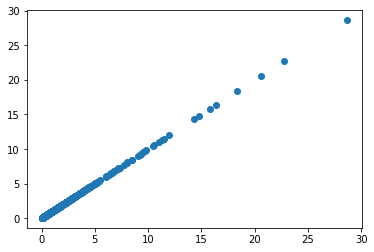

In [14]:
plt.scatter(y_pred,y_test)

# Graph Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Shooter'),
  Text(2, 0, 'Role-Playing'),
  Text(3, 0, 'Platform'),
  Text(4, 0, 'Sports'),
  Text(5, 0, 'Racing'),
  Text(6, 0, 'Misc'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Puzzle'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

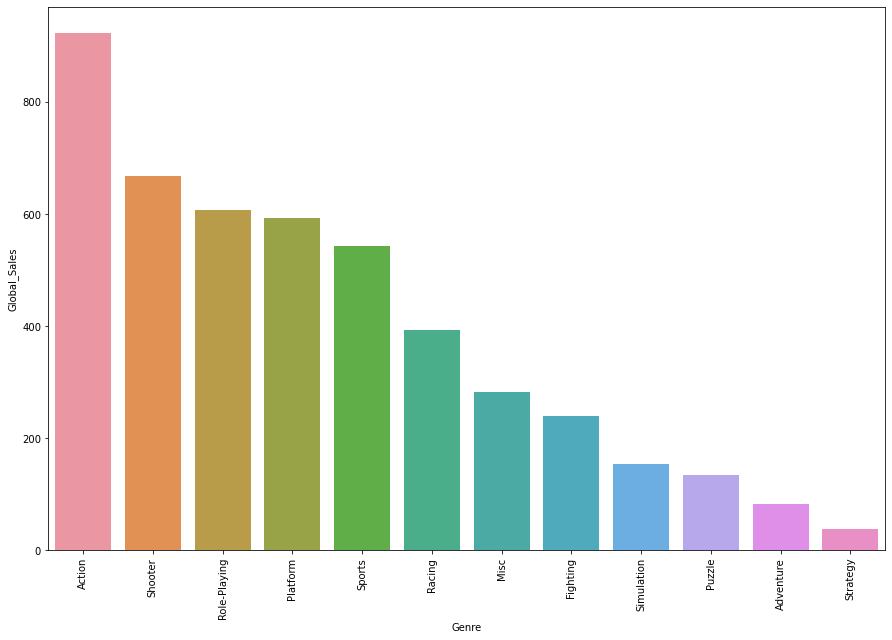

In [15]:
# Popular Genre games by global sales

data_genre = df.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2010.0'),
  Text(1, 0, '2011.0'),
  Text(2, 0, '2008.0'),
  Text(3, 0, '2009.0'),
  Text(4, 0, '2007.0')])

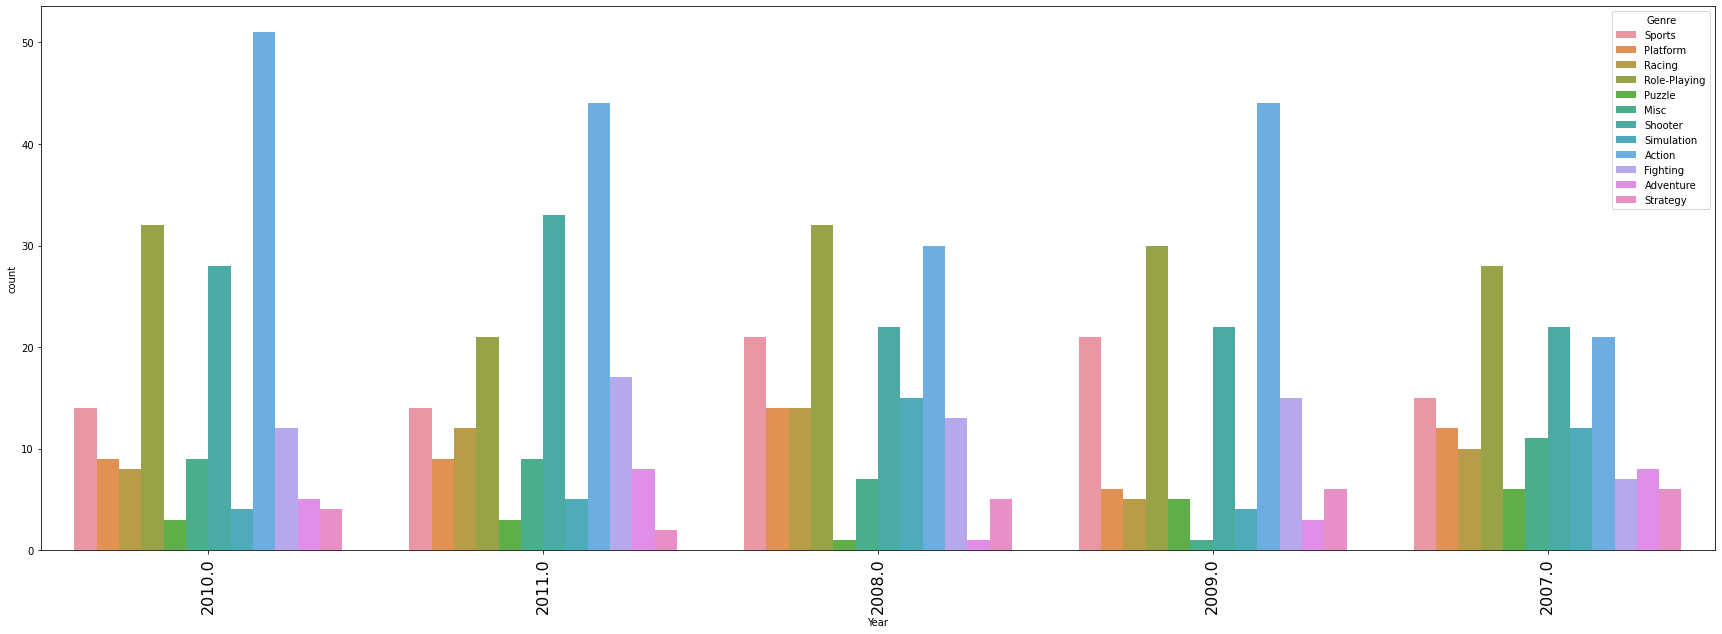

In [16]:
# Top 5 years game realese by Genre

plt.figure(figsize=(30, 10))
sns.countplot(x='Year', data=df, hue='Genre', order=df.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

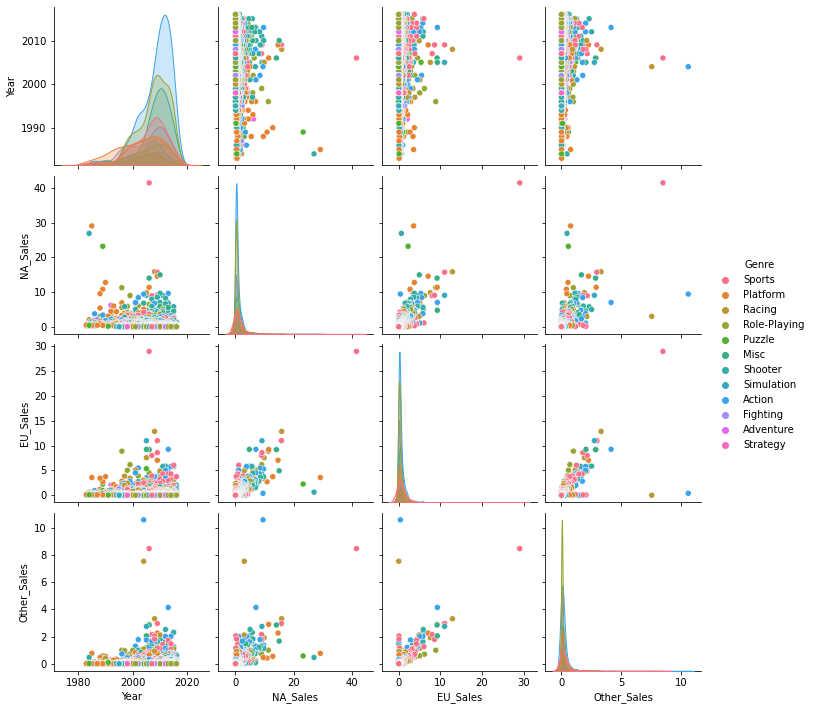

In [17]:
data_pair = df.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
sns.pairplot(data_pair, hue='Genre')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'PS3'),
  Text(1, 0, 'X360'),
  Text(2, 0, 'PS2'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'PS'),
  Text(6, 0, 'PS4'),
  Text(7, 0, 'GB'),
  Text(8, 0, 'NES'),
  Text(9, 0, '3DS'),
  Text(10, 0, 'N64'),
  Text(11, 0, 'GBA'),
  Text(12, 0, 'SNES'),
  Text(13, 0, 'PSP'),
  Text(14, 0, 'GC'),
  Text(15, 0, 'WiiU'),
  Text(16, 0, 'XOne'),
  Text(17, 0, 'XB'),
  Text(18, 0, 'PSV'),
  Text(19, 0, 'GEN'),
  Text(20, 0, 'DC'),
  Text(21, 0, 'SAT'),
  Text(22, 0, 'SCD')])

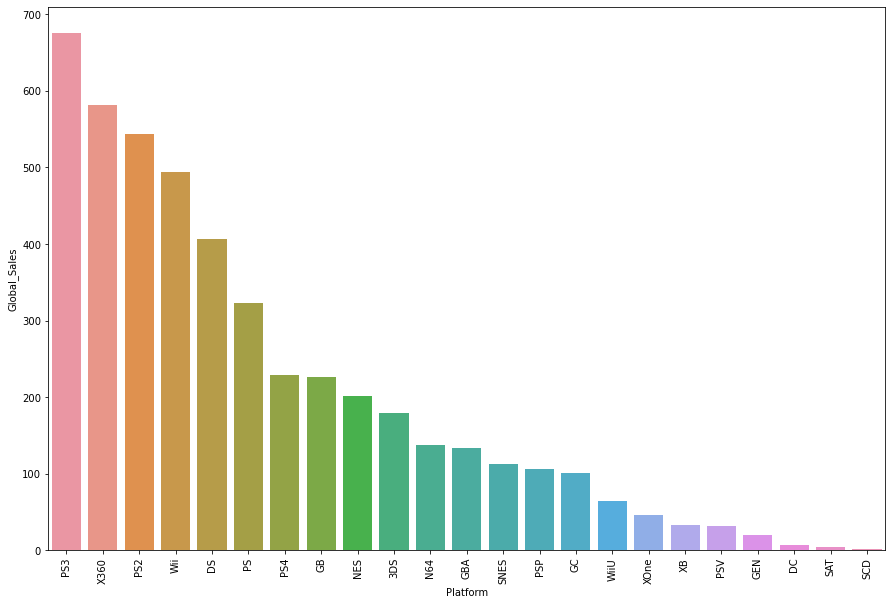

In [18]:
# Most platform global sales

data_platform = df.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)
# data_platform

plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Sony Computer Entertainment'),
  Text(3, 0, 'Capcom'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'Namco Bandai Games'),
  Text(6, 0, 'Square Enix'),
  Text(7, 0, 'Ubisoft'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Tecmo Koei'),
  Text(10, 0, 'Activision'),
  Text(11, 0, 'Take-Two Interactive'),
  Text(12, 0, 'Microsoft Game Studios'),
  Text(13, 0, 'THQ'),
  Text(14, 0, 'Nippon Ichi Software'),
  Text(15, 0, 'Atari'),
  Text(16, 0, 'Warner Bros. Interactive Entertainment'),
  Text(17, 0, 'Codemasters'),
  Text(18, 0, 'Rising Star Games'),
  Text(19, 0, 'Bethesda Softworks')])

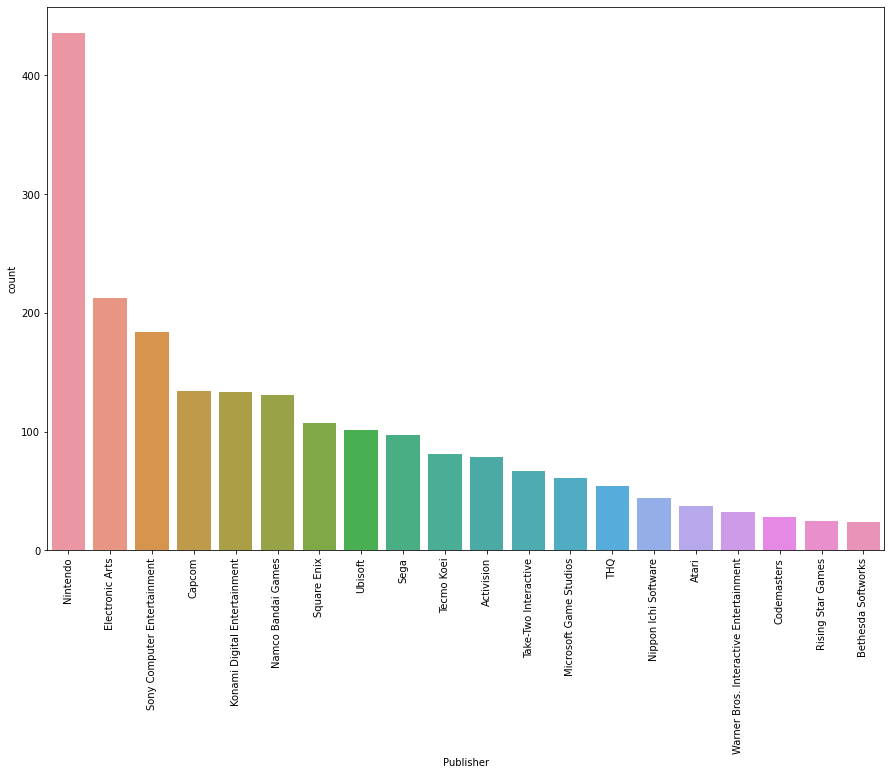

In [19]:
# top game publisher

plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=df, order = df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)

<AxesSubplot:>

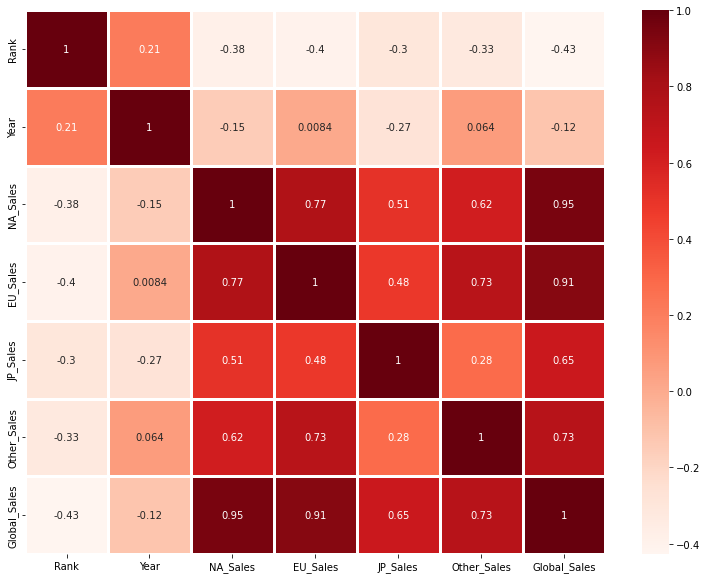

In [20]:
# Confussion Matrix

from seaborn import heatmap
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), cmap = "Reds", annot=True, linewidth=3)